<a href="https://colab.research.google.com/github/PriyathamVarma/tensorflow/blob/main/TensorFlow_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This note book is on creating code for a neural network using tensorflow
# created on 25/12/2021.

In [61]:
# this is for specifing the exact version
%tensorflow_version 1.3.0

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.3.0`. This will be interpreted as: `1.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [122]:
# imports
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


In [63]:
tf.__version__

'1.15.2'

# The aim is to create a neural network with tensorflow using graphs, variables and placeholders
# Objectives

1.  Creating a neuron that performs basic linear fit to transform a 2-d data.
For this purpose we will use wx+b to feed into an activation function. x can be derived by placeholder, w and b can be derived by variables. 






In [64]:
np.random.seed(101)
tf.set_random_seed(101)

In [65]:
# create placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [66]:
add_operations = a + b

In [67]:
multiply_operations = a * b

In [68]:
sess = tf.Session()

In [69]:
# run the session, the important thing here is that we have to pass on the data to placeholders
sess.run(add_operations,feed_dict={a:10,b:20})

30.0

In [70]:
# now if we want to pass on arrays then lets create an array and pass that into the placeholders
array_a = np.random.uniform(1,100,(5,5))

In [71]:
array_a

array([[52.12346414, 57.4960911 ,  3.81894842, 17.98064397, 68.84242119],
       [83.5557894 , 31.38965575, 89.46769489, 72.43284232, 19.80395647],
       [55.86853152, 35.86106345, 19.00734786, 78.77457442, 96.58283902],
       [24.00301252,  9.27258193, 60.75129381, 73.17028297, 28.34764402],
       [68.84532655, 52.26887995,  5.79996921, 14.64905452, 19.50977519]])

In [72]:
array_b = np.random.uniform(1,100,(5,1))
array_b

array([[99.43747221],
       [52.54587427],
       [58.30016401],
       [73.74708677],
       [54.65421545]])

In [73]:
# create placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)

In [74]:
add_operations = a + b

In [75]:
multiply_operations = a * b

In [76]:
# check the operations by passing array_a and array_b to the dict inside session
sess.run(add_operations,feed_dict={a:array_a,b:array_b})

array([[151.56093 , 156.93356 , 103.25642 , 117.41811 , 168.27989 ],
       [136.10165 ,  83.93553 , 142.01358 , 124.97872 ,  72.34983 ],
       [114.16869 ,  94.161224,  77.30751 , 137.07474 , 154.883   ],
       [ 97.7501  ,  83.01967 , 134.49838 , 146.91736 , 102.09473 ],
       [123.49954 , 106.923096,  60.454185,  69.30327 ,  74.163994]],
      dtype=float32)

# You might see some steps repeatating, this is because the steps should be in sequential to get the code running. First declare array_a and array_b, then do the placeholders, then do the add, multiply operations. Finally run the session.

In [77]:
# multiply operations
sess.run(multiply_operations,feed_dict={a:array_a,b:array_b})

array([[5183.0254 , 5717.2656 ,  379.74658, 1787.9497 , 6845.516  ],
       [4390.5117 , 1649.397  , 4701.1587 , 3806.0474 , 1040.6162 ],
       [3257.1445 , 2090.706  , 1108.1315 , 4592.5703 , 5630.7954 ],
       [1770.1521 ,  683.8259 , 4480.231  , 5396.0947 , 2090.5562 ],
       [3762.6875 , 2856.7146 ,  316.99277,  800.6326 , 1066.2915 ]],
      dtype=float32)

# Creating the neural network

In [117]:
features = 10
dense_neurons = 3
mini_batch = 5

In [103]:
x = tf.placeholder(tf.float32,(None,features))

In [104]:
W = tf.Variable(tf.random_normal([features, dense_neurons]))

In [105]:
b = tf.Variable(tf.ones([dense_neurons]))

In [107]:
xW = tf.matmul(x,W)

In [108]:
z = tf.add(xW , b)

In [109]:
z

<tf.Tensor 'Add_10:0' shape=(?, 3) dtype=float32>

In [110]:
# activation function
a = tf.sigmoid(z)

In [111]:
a

<tf.Tensor 'Sigmoid_4:0' shape=(?, 3) dtype=float32>

In [112]:
# initialize variables
init = tf.global_variables_initializer()

In [113]:
sess.run(init)

In [118]:
sess.run(a,feed_dict={x:np.random.random([mini_batch,features])})

array([[0.32093835, 0.9753169 , 0.9000826 ],
       [0.17077655, 0.8696216 , 0.8325825 ],
       [0.14852801, 0.74449015, 0.5742336 ],
       [0.40211484, 0.9377495 , 0.82071096],
       [0.34791327, 0.96002585, 0.8115634 ]], dtype=float32)

# Cost function sample showing some linear regression example

In [135]:
x_data = np.linspace(0,10,10) + np.random.uniform(-1,1,10)
# Here we are creating a regression line with some noise

In [136]:
x_data

array([0.20825807, 1.09392664, 2.80852675, 2.68738298, 4.12850359,
       5.06661849, 6.13202366, 8.30001162, 9.77578966, 9.95564051])

In [137]:
y_label = np.linspace(0,10,10) + np.random.uniform(-1,1,10)

In [138]:
y_label

array([-0.93831267,  1.29535012,  1.89576863,  3.34161562,  3.49193646,
        5.1788283 ,  7.38177965,  7.58969137,  9.04066694, 10.38231412])

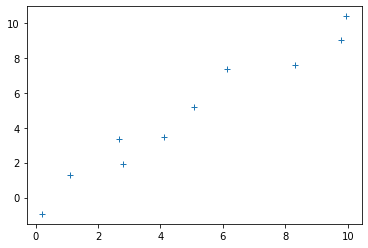

In [139]:
plt.plot(x_data,y_label,'+')

In [140]:
# y = mx+b, this is the equation to be solved.
m = tf.Variable(np.random.rand(1))
b = tf.Variable(np.random.rand(1))

In [142]:
error = 0

for x,y in zip(x_data,y_label):
  y_hat = m*x + b

  error += (y-y_hat)**2


In [154]:
sess.run(error)

array([9.39047494])

# use optimizer

In [143]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.001)

In [145]:
optimizer

In [146]:
train = optimizer.minimize(error)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [148]:
# initialize variables
init = tf.global_variables_initializer()

In [149]:
sess.run(init)

In [151]:
training_steps = 1

In [152]:
for i in range(training_steps):
  sess.run(train)

In [155]:
final_slope, final_intercept = sess.run([m,b])

In [157]:

final_slope

array([0.87022233])

In [158]:
final_intercept

array([0.82750668])

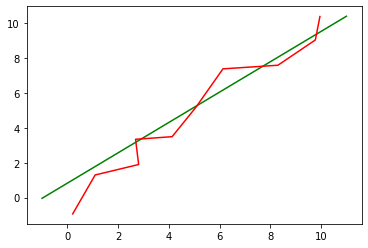

In [162]:
# test the data

x_test = np.linspace(-1,11,10)

y_pred = final_slope * x_test + final_intercept

plt.plot(x_test,y_pred,color="green")
plt.plot(x_data,y_label,color="red")